# Load Library

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data

In [161]:
dataobj = datasets.load_iris()

In [162]:
data = pd.concat([pd.DataFrame(dataobj.data, columns = dataobj.feature_names),
                pd.DataFrame(dataobj.target, columns = ['target'])
               ], axis=1)

In [163]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [164]:
## Extract last 2 columns
X = data.iloc[:, 2:4]
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [165]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

# Split Data

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [167]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 2)
X_test.shape = (45, 2)


# Standardized Data

In [168]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [169]:
X_train_t = scale.transform(X_train)
X_test_t = scale.transform(X_test)

# Model Traning

In [170]:
lr = LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [171]:
## Hyper-parameter
solve = 'lbfgs'
C = .1
max_iter = 100
random_state = 99

In [172]:
lr = LogisticRegression(C=C, random_state=random_state, verbose=1, max_iter=max_iter)
lr

LogisticRegression(C=0.1, random_state=99, verbose=1)

In [173]:
## fitting model
lr.fit(X_train_t, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15354D+02    |proj g|=  4.55290D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     13      1     0     0   1.039D-04   5.986D+01
  F =   59.860552534145441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.1, random_state=99, verbose=1)

In [174]:
## predict test
y_pred = lr.predict(X_test_t)
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [175]:
## predict test prob
## probability : class0, class1, class2
prob_test = lr.predict_proba(X_test_t)
prob_test[:5]

array([[0.01169119, 0.25543892, 0.7328699 ],
       [0.76842903, 0.21471369, 0.01685728],
       [0.81901966, 0.17030323, 0.01067711],
       [0.07087664, 0.46263549, 0.46648786],
       [0.11856942, 0.52692117, 0.35450941]])

In [194]:
temp = pd.concat([
    pd.DataFrame(X_test_t, columns = ['X_1_std', 'X_2_std']),
    pd.DataFrame(prob_test, columns = ['prob_class_0', 'prob_class_1', 'prob_class_2']),
    pd.DataFrame(y_pred, columns = ['predicted'])
], axis = 1)
temp = pd.concat([temp, y_test.reset_index(drop = True)], axis = 1)
temp.head()

,X_1_std,X_2_std,prob_class_0,prob_class_1,prob_class_2,predicted,target
0,0.898203,1.445879,0.011691,0.255439,0.732870,2,2
1,-1.165380,-1.045078,0.768429,0.214714,0.016857,0,0
2,-1.332697,-1.176181,0.819020,0.170303,0.010677,0,0
3,0.396250,0.659261,0.070877,0.462635,0.466488,2,2
4,0.340478,0.265952,0.118569,0.526921,0.354509,1,1


In [177]:
## penalties weight
lr.coef_

array([[-0.95198785, -0.85955884],
       [ 0.1731371 , -0.04163926],
       [ 0.77885075,  0.9011981 ]])

In [178]:
## Norm of weight cofficients (affected by C values)
print(f'Norm of W : {np.linalg.norm(lr.coef_)}')

Norm of W : 1.759431460467777


In [179]:
## Miss classifed
sumMiss = (y_test != y_pred).sum()
print(f'Miss Classified = {sumMiss}')

Miss Classified = 0


In [180]:
## Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Figure size 2000x1000 with 0 Axes>

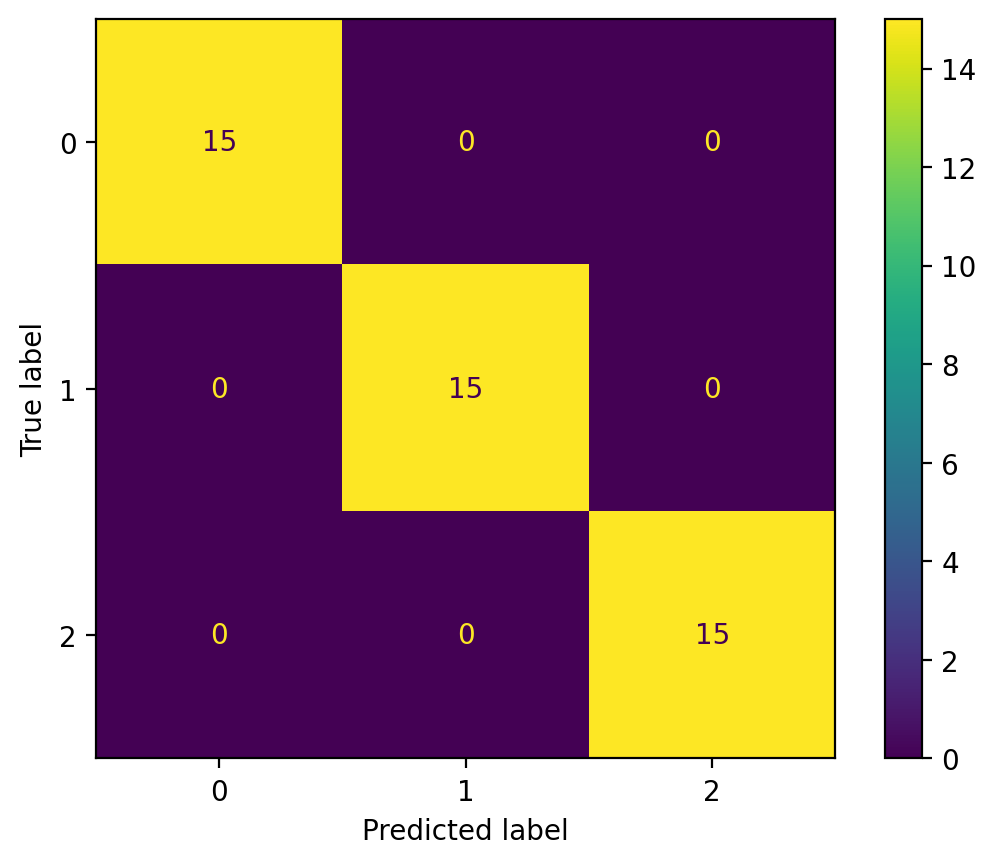

In [181]:
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
plt.figure(figsize=(20, 10))
fig.plot()

<Axes: xlabel='X_1_std', ylabel='X_2_std'>

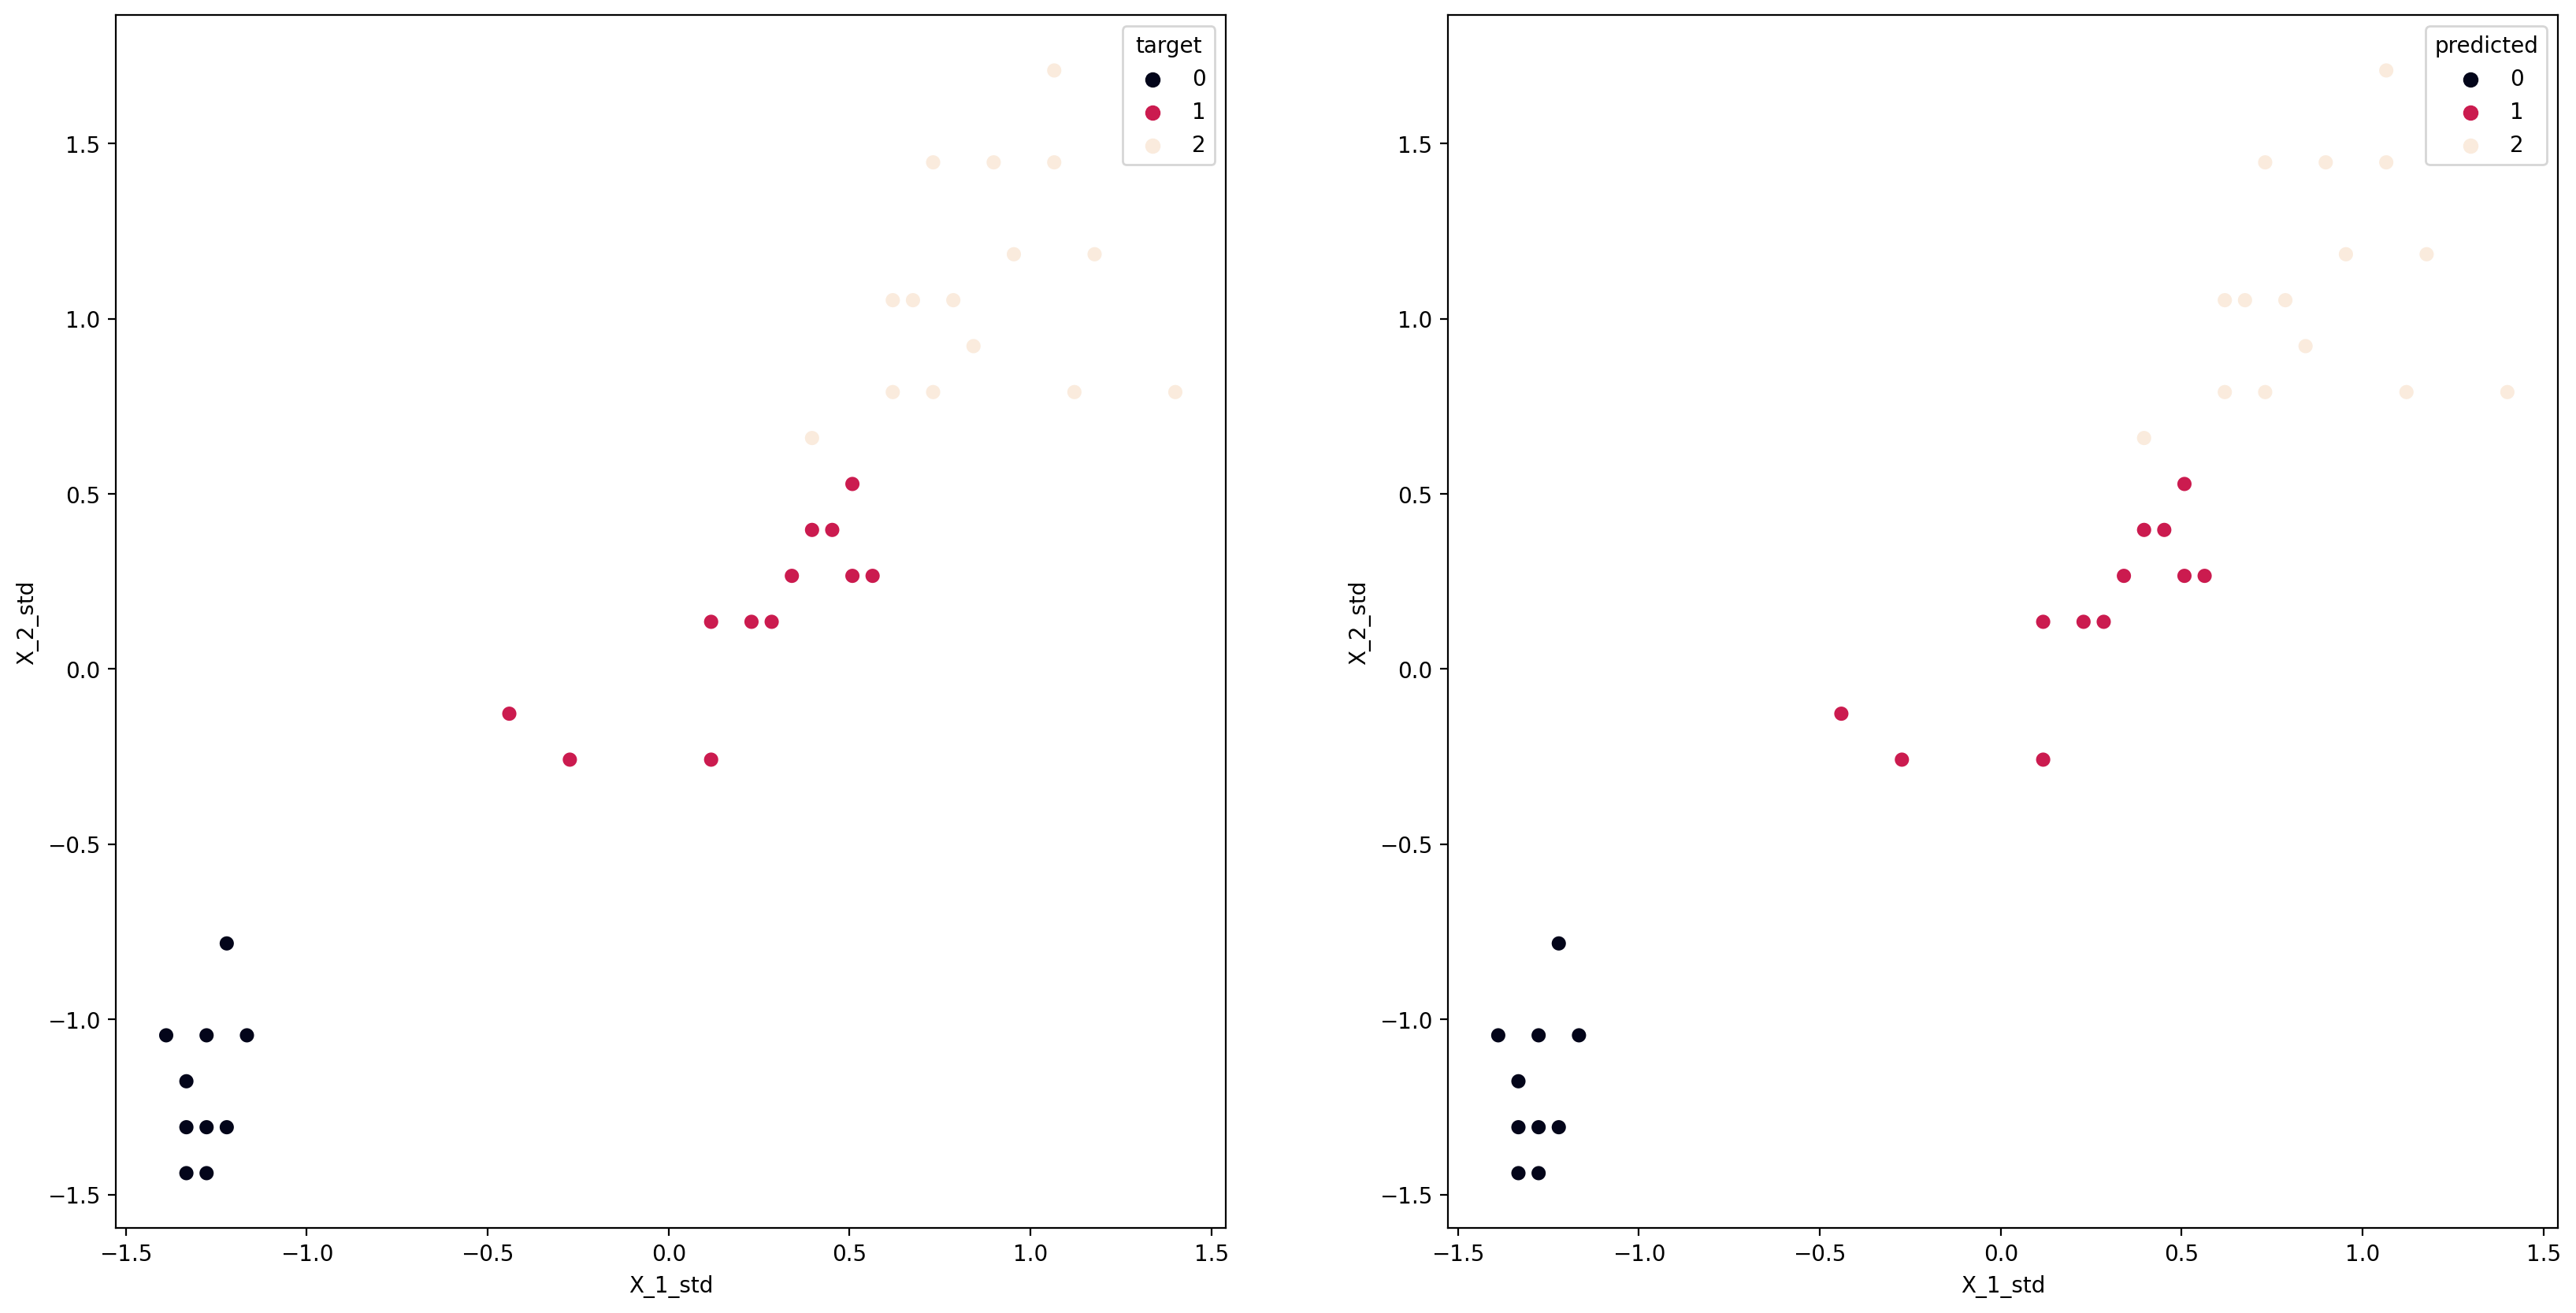

In [196]:
fig, ax = plt.subplots(1, 2,figsize = (20, 10))
sns.scatterplot(data = temp, x = 'X_1_std', y = 'X_2_std', s = 50, hue = 'target', palette='rocket', ax = ax[0])
sns.scatterplot(data = temp, x = 'X_1_std', y = 'X_2_std', s = 50, hue = 'predicted', palette='rocket', ax = ax[1])

In [217]:
paramSet = {
    'ex1' : {'C' : 0.001},
    'ex2' : {'C' : 0.01},
    'ex3' : {'C' : 0.1}
}

In [222]:
for paramName, paramValues  in paramSet.items():
    lr = LogisticRegression(C = paramValues['C'], max_iter= 1000)
    lr.fit(X_train_t, y_train)
    y_pred = lr.predict(X_test_t)
    
    print(f'C = {paramValues["C"]} \n')
    print(f'Train Accuracy : {lr.score(X_train, y_train)} \n')
    print(metrics.classification_report(y_test, y_pred))
    print('--' * 50 + '\n')

C = 0.001 

Train Accuracy : 0.3333333333333333 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.00      0.00      0.00        15
           2       0.56      1.00      0.71        15

    accuracy                           0.67        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.46      0.67      0.54        45

----------------------------------------------------------------------------------------------------

C = 0.01 

Train Accuracy : 0.3333333333333333 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.33      0.50        15
           2       0.65      1.00      0.79        15

    accuracy                           0.78        45
   macro avg       0.84      0.78      0.74        45
weighted avg       0.84      0.78      0.74        45

-------------------------------------

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-d